<a href="https://colab.research.google.com/github/drAshcroft/MAT422/blob/main/KmeansandSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 3.5 Examples of using kmeans to classify data

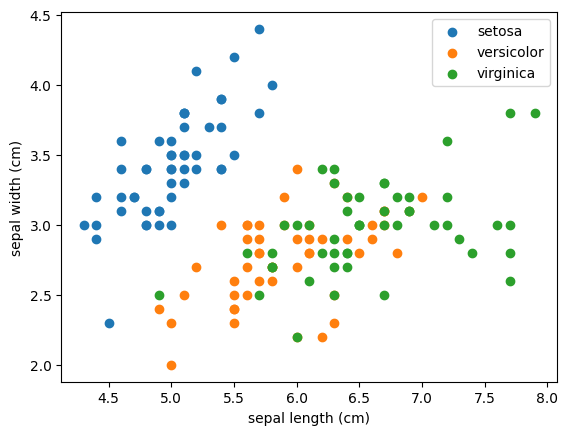

In [4]:
#import sklearn modules related to kmeans.  These perform a variety of different standard manipulations for kmeans data
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np


#we will create some data with the iris dataset to give somewhat useful idea of how the kmeans data works
from sklearn import datasets

iris = datasets.load_iris()

#make a plot of the iris data
targets = list(set(iris.target))
for targetName, target in zip( iris.target_names,targets):
  plt.scatter(iris.data[iris.target==target, 0], iris.data[iris.target==target, 1], label=targetName)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()
#we

We can see that the data is seperable into classes but still complicated by the intermixing

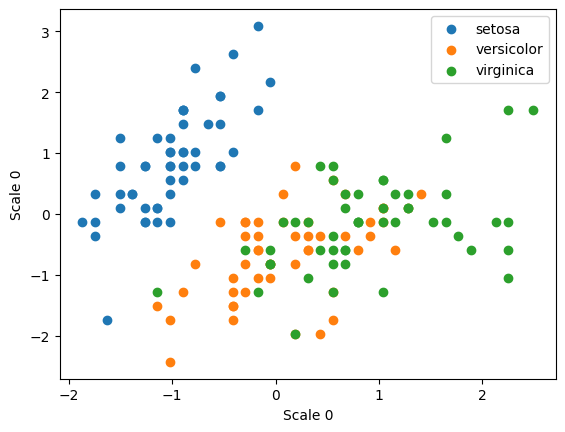

In [5]:
#we need to scale the data to make it more reliable for the kmeans algorythm as well as preventing false clusters
scaler = StandardScaler()
scaled  = scaler.fit_transform(iris.data)


#make a plot of the scaled iris data
targets = list(set(iris.target))
for targetName, target in zip( iris.target_names,targets):
  plt.scatter(scaled[iris.target==target, 0], scaled[iris.target==target, 1], label=targetName)

plt.xlabel('Scale 0')
plt.ylabel('Scale 0')
plt.legend()
plt.show()

IT can be seen that the data has not changed in relation to other points in the data,  only in the values of the axis and the standard deviation of the data

In [16]:
kmeansObj = KMeans( init="random", n_clusters=np.max(targets)+1, n_init=np.max(targets)*4, max_iter=200 )
kmeansObj.fit(scaled)

#output some info about the kmeans clustering
kmeansObj.cluster_centers_

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

This shows the center of each of the identified clusters in the 4D space that the data originally came from


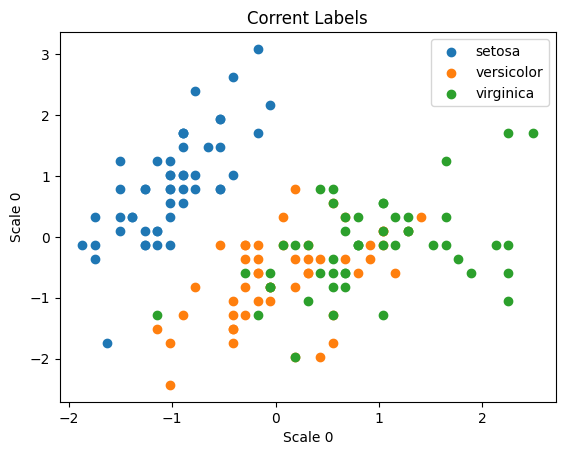

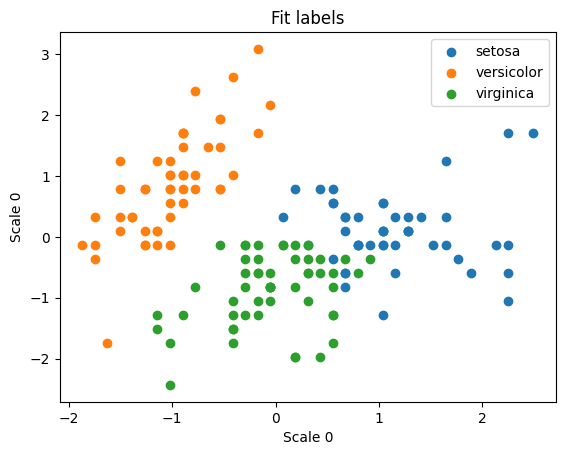

In [18]:
targets = list(set(iris.target))
for targetName, target in zip( iris.target_names,targets):
  plt.scatter(scaled[iris.target==target, 0], scaled[iris.target==target, 1], label=targetName)

plt.title('Corrent Labels')
plt.xlabel('Scale 0')
plt.ylabel('Scale 0')
plt.legend()
plt.show()

labels = kmeansObj.labels_
targets = list(set(iris.target))
for targetName, target in zip( iris.target_names,targets):
  plt.scatter(scaled[labels==target, 0], scaled[labels==target, 1], label=targetName)

plt.title('Fit labels')
plt.xlabel('Scale 0')
plt.ylabel('Scale 0')
plt.legend()
plt.show()

It is clean that the intermixing of the data makes it difficult for the kmeans to get a complete clustering solution fit.  Kmeans is a linear technique and so data that requires a complicated boundry will defeat it.

HW 3.6 Support Vector machine

In [31]:
#import sklearn modules related to kmeans.  These perform a variety of different standard manipulations for kmeans data
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
#we will create some data with the iris dataset to give somewhat useful idea of how the kmeans data works
from sklearn import datasets
#next get modules for performing support vector machines
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


#load the iris data and scale it to prepare for future processing
iris = datasets.load_iris()

#we need to scale the data to make it more reliable for the kmeans algorythm as well as preventing false clusters
scaler = StandardScaler()
scaled  = scaler.fit_transform(iris.data)



Support Vector Machines work by defining the different classes by means of vectors that define the boundries between classes.  Python has libraryies that use a similar interface as the kmeans classification to determine these vectors.

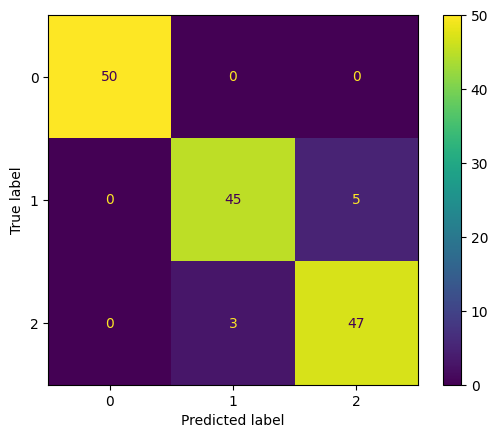

In [32]:
clf =LinearSVC( random_state=0, tol=1e-5)
clf.fit(scaled, iris.target)

#can check the training by performing a prediction on the test set
pred=clf.predict(scaled)

cm = confusion_matrix(iris.target, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

This shows that the SVM is able to create a fairly good test when tested on the data that it is trained on.  This is a bit of a problem for scoring real models, so we split the data to get better information.

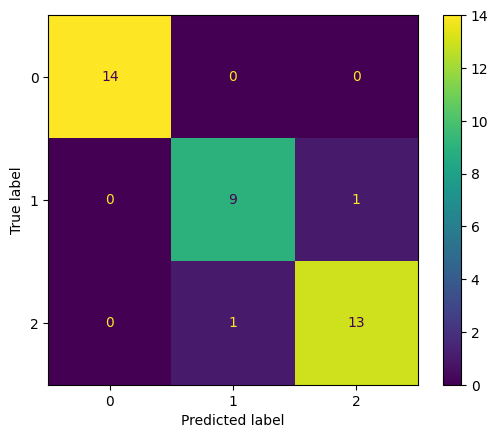

In [33]:
#randomly split the data up into a test set and train set
X_train, X_test, y_train, y_test = train_test_split( scaled, iris.target, test_size=0.25, random_state=100)


clf =LinearSVC( random_state=0, tol=1e-5)
clf.fit(X_train, y_train)

#can check the training by performing a prediction on the test set
pred=clf.predict(X_test)

cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

This shows that the SVM is still able to make a model that generalizes to being able to predict on data that it has not seen before

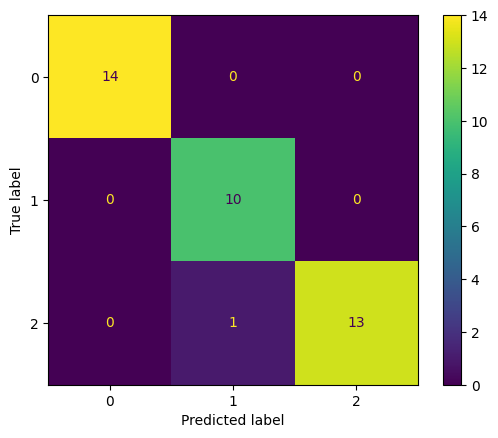

In [35]:
#do the training with a non linear kernal to determine if the model must be nonlinear to get good results
clf = svm.SVC(kernel='rbf', gamma=2).fit(X_train, y_train)

#can check the training by performing a prediction on the test set
pred=clf.predict(X_test)

cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

We see that moving to a more complicated model does not improve the accuracy